In [1]:
# Install the required package
!pip install indoxGen_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dep

## Load the Dataset
We will load the "Adult.csv" dataset and define the relevant columns for categorical, mixed, and integer data types.


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Adult.csv")

# Define categorical, mixed, and integer columns
categorical_columns = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country", "income"]
mixed_columns = {"capital-gain": "positive", "capital-loss": "positive"}  # Mixed columns
integer_columns = ["age", "fnlwgt", "hours-per-week", "capital-gain", "capital-loss"]


## Setting Up the GAN Configuration
Next, we'll define the configuration for the GAN model using `TabularGANConfig` from the `indoxGen_torch` package. The configuration includes the size of the input noise vector, the layers of the generator and discriminator, the learning rate, batch size, and other training parameters.


In [2]:
# Import GAN config and trainer from the indoxGen_torch package
from indoxGen_torch import TabularGANConfig, TabularGANTrainer

# Set up the configuration for the GAN
config = TabularGANConfig(
    input_dim=200,  # Dimension of the input noise vector
    generator_layers=[128, 256, 512],  # Layers of the generator
    discriminator_layers=[512, 256, 128],  # Layers of the discriminator
    learning_rate=2e-4,
    beta_1=0.5,  # First momentum term for Adam optimizer
    beta_2=0.9,  # Second momentum term for Adam optimizer
    batch_size=128,
    epochs=50,  # Number of training epochs
    n_critic=5  # Number of critic (discriminator) updates per generator update
)


## Initializing and Training the GAN
We'll now initialize the GAN trainer using the configuration and the defined columns for categorical, mixed, and integer data. Then, we will train the GAN model on the loaded dataset.


In [8]:
# Initialize the trainer with the configuration and column information
trainer = TabularGANTrainer(
    config=config,
    categorical_columns=categorical_columns,
    mixed_columns=mixed_columns,
    integer_columns=integer_columns
)

# Train the GAN model
history = trainer.train(data, patience=15)


Epoch [1/50] - D Loss: -1.2343, G Loss: 0.3484
Epoch [2/50] - D Loss: -0.5875, G Loss: 1.6880
Epoch [3/50] - D Loss: -0.7073, G Loss: 3.4886
Epoch [4/50] - D Loss: -0.7798, G Loss: 4.4803
Epoch [5/50] - D Loss: -0.8047, G Loss: 4.9416
Epoch [6/50] - D Loss: -0.8441, G Loss: 5.2257
Epoch [7/50] - D Loss: -0.8590, G Loss: 5.3338
Epoch [8/50] - D Loss: -0.8975, G Loss: 5.1982
Epoch [9/50] - D Loss: -0.9033, G Loss: 5.2058
Epoch [10/50] - D Loss: -0.9292, G Loss: 5.0814
Epoch [11/50] - D Loss: -0.9422, G Loss: 5.4158
Epoch [12/50] - D Loss: -0.9553, G Loss: 5.4796
Epoch [13/50] - D Loss: -0.9558, G Loss: 5.7064
Epoch [14/50] - D Loss: -0.9518, G Loss: 5.6175
Epoch [15/50] - D Loss: -0.9537, G Loss: 5.3998
Epoch [16/50] - D Loss: -0.9504, G Loss: 5.1652

Early stopping triggered. Generator loss did not improve for 15 epochs.
Training stopped early at epoch 16 due to no improvement in generator loss.


## Display the First Few Rows of Real Data
We will now display the first 5 rows of the real dataset to get an overview of the original data.


In [9]:
# Display the first few rows of the real dataset
data.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,4,0,3,4,0,0,0,30,39,0


## Generating Synthetic Data
After training the GAN model, we can generate synthetic data. Here, we will generate 50,000 samples of synthetic data.


In [10]:
# Generate synthetic data (e.g., 50,000 samples)
synthetic_data = trainer.generate_samples(50000)


## Display the First Few Rows of Synthetic Data
After generating the synthetic data, let's display the first 5 rows of the synthetic dataset to see how the generated data looks.


In [11]:
# Display the first few rows of the synthetic dataset
synthetic_data.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,26,4,206323,15,4,6,3,4,1,608,13,29,39,0
1,26,4,284438,9,5,10,4,4,0,0,0,47,39,0
2,52,6,85206,11,2,4,0,2,1,516,0,43,39,0
3,52,4,275938,15,6,12,4,4,0,0,16,38,39,0
4,28,4,254722,15,2,10,5,4,0,0,0,34,39,1


## Evaluating the Synthetic Data
We will evaluate the generated synthetic data using several methods:
1. **Utility**: How well the synthetic data retains utility for machine learning tasks.
2. **Statistical Similarity**: Compare statistical properties between real and synthetic data.
3. **Privacy**: Check for privacy risks in synthetic data.
4. **Data Drift**: Measure distributional changes between the real and synthetic data.
5. **Distributions**: Visualize the distributions of categorical and integer columns.



Utility Metrics Comparison (Real vs. Synthetic):

Classifier: LOGISTICREGRESSION
Accuracy: Real = 80.45, Synthetic = 76.27, Difference = 4.18
AUC: Real = 0.82, Synthetic = 0.72, Difference = 0.09
F1 Score: Real = 0.65, Synthetic = 0.45, Difference = 0.20

Classifier: DECISIONTREE
Accuracy: Real = 81.29, Synthetic = 62.26, Difference = 19.03
AUC: Real = 0.75, Synthetic = 0.64, Difference = 0.11
F1 Score: Real = 0.75, Synthetic = 0.58, Difference = 0.16

Classifier: RANDOMFOREST
Accuracy: Real = 86.24, Synthetic = 69.55, Difference = 16.70
AUC: Real = 0.91, Synthetic = 0.77, Difference = 0.14
F1 Score: Real = 0.80, Synthetic = 0.65, Difference = 0.14

Classifier: MULTILAYERPERCEPTRON
Accuracy: Real = 83.86, Synthetic = 72.65, Difference = 11.21
AUC: Real = 0.89, Synthetic = 0.77, Difference = 0.13
F1 Score: Real = 0.76, Synthetic = 0.66, Difference = 0.10

Statistical Similarity Metrics:
Average Wasserstein Distance (Continuous Columns): 0.0243
Average Jensen-Shannon Divergence (Categor

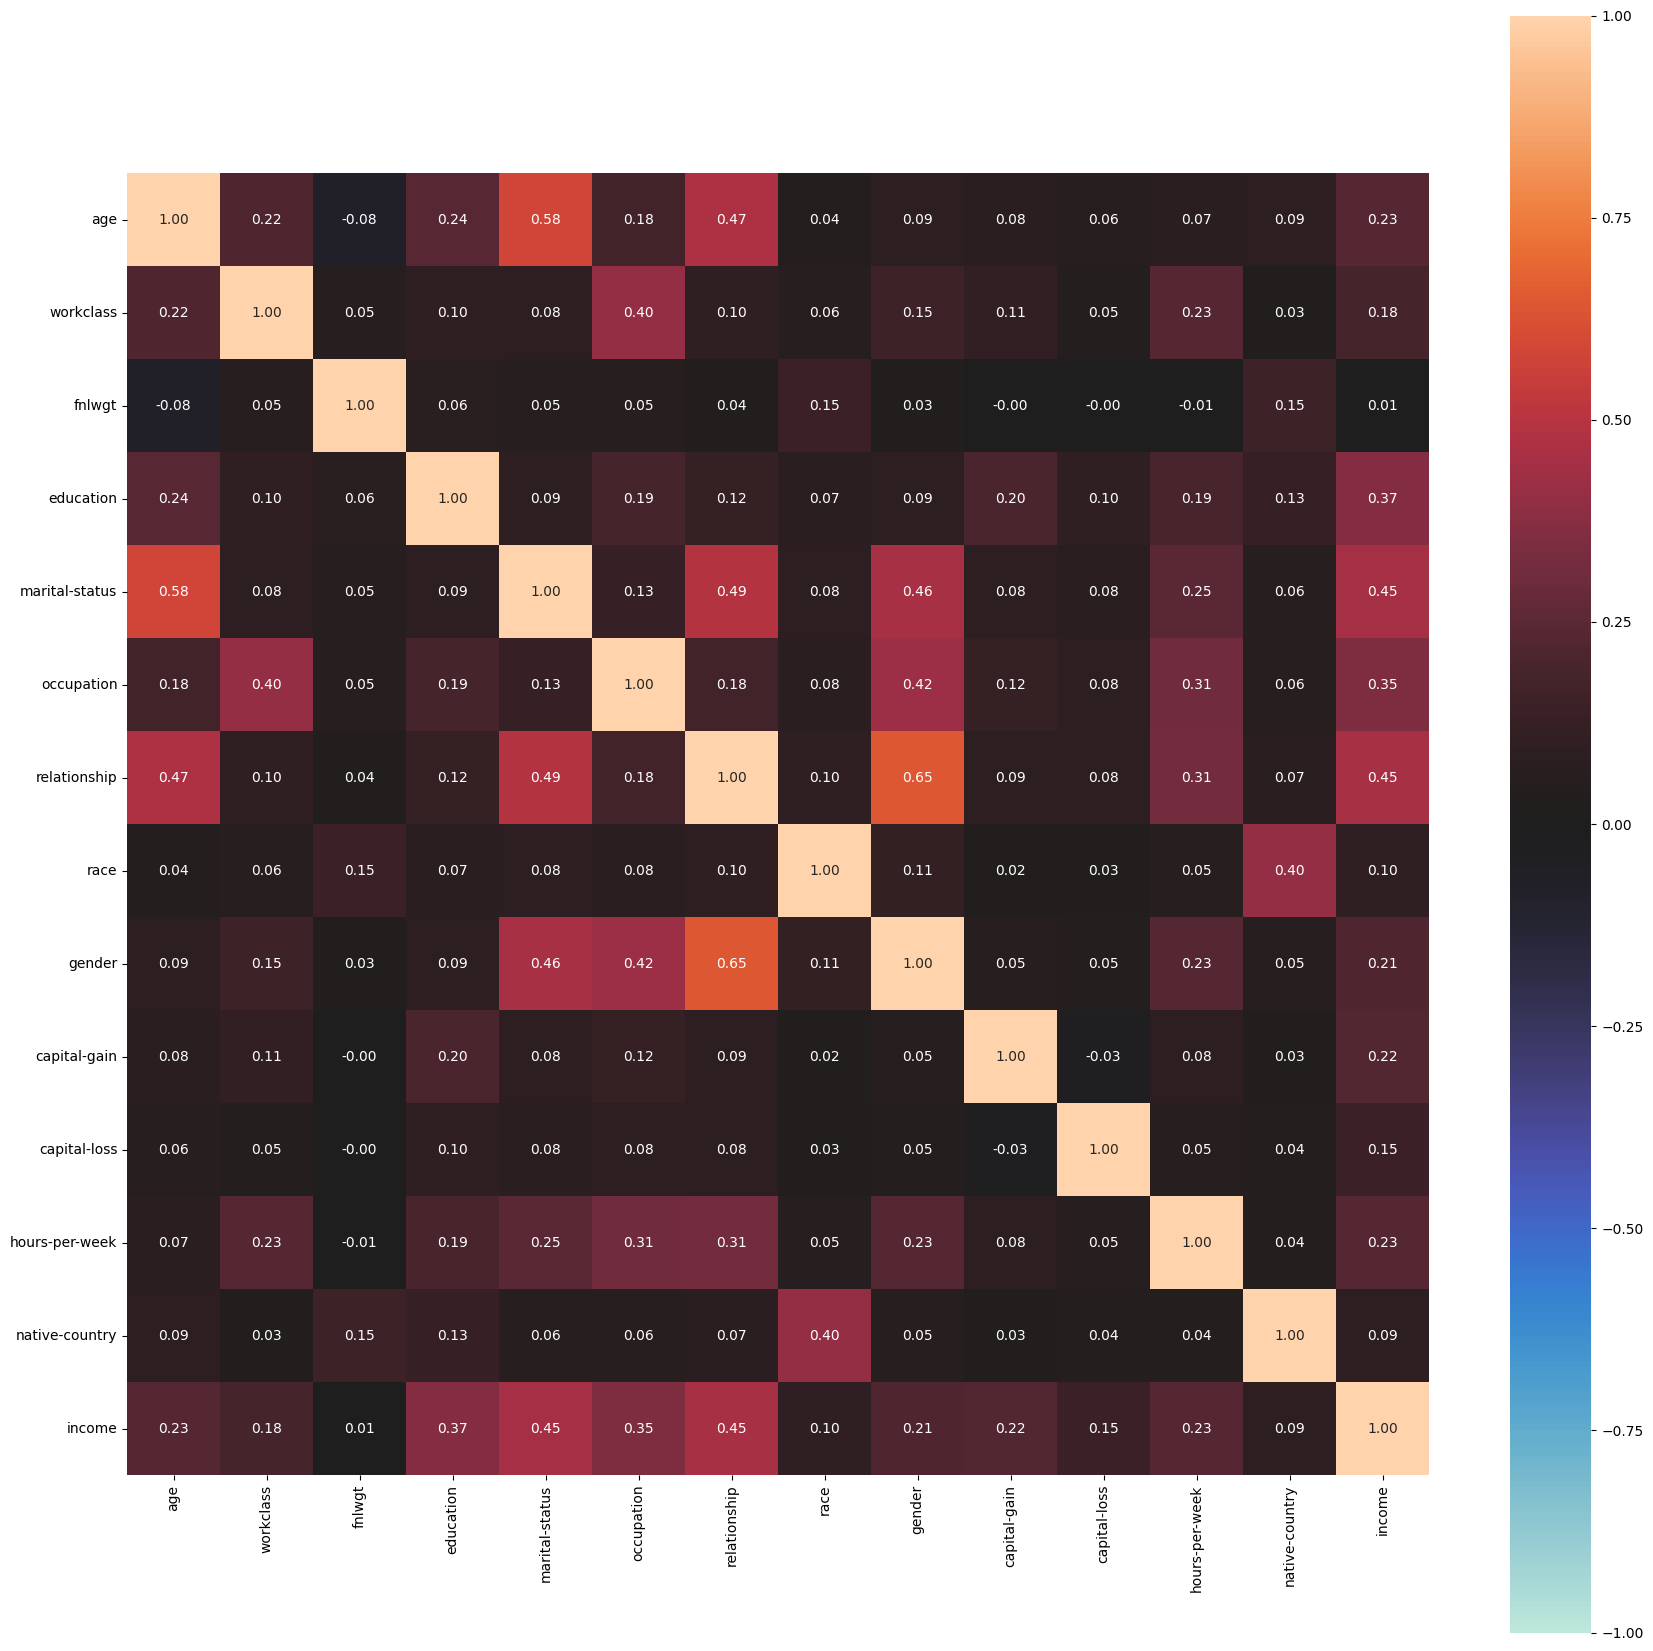

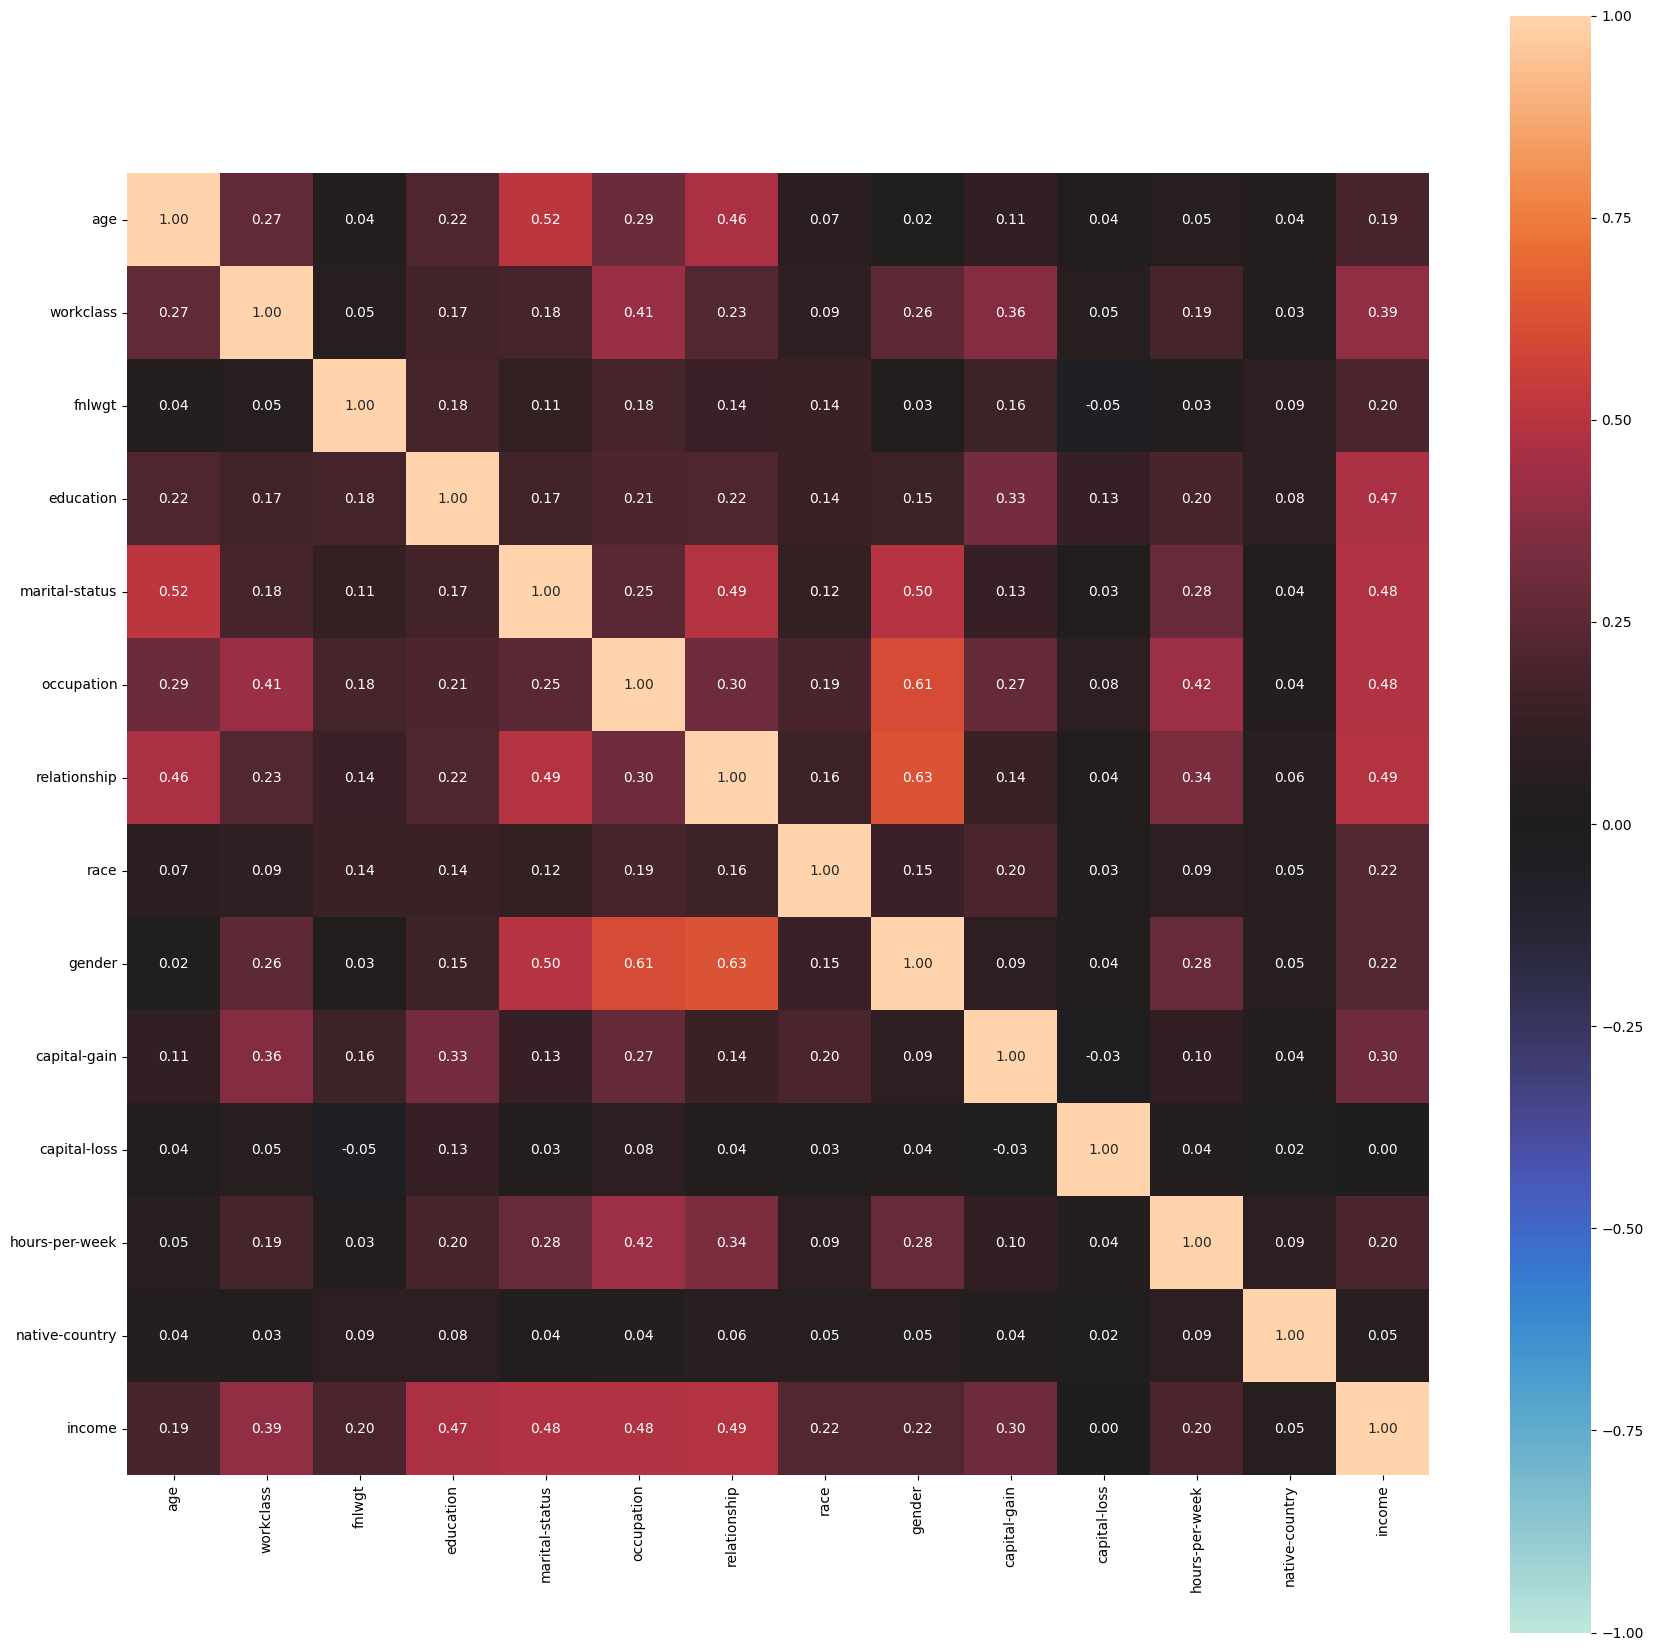

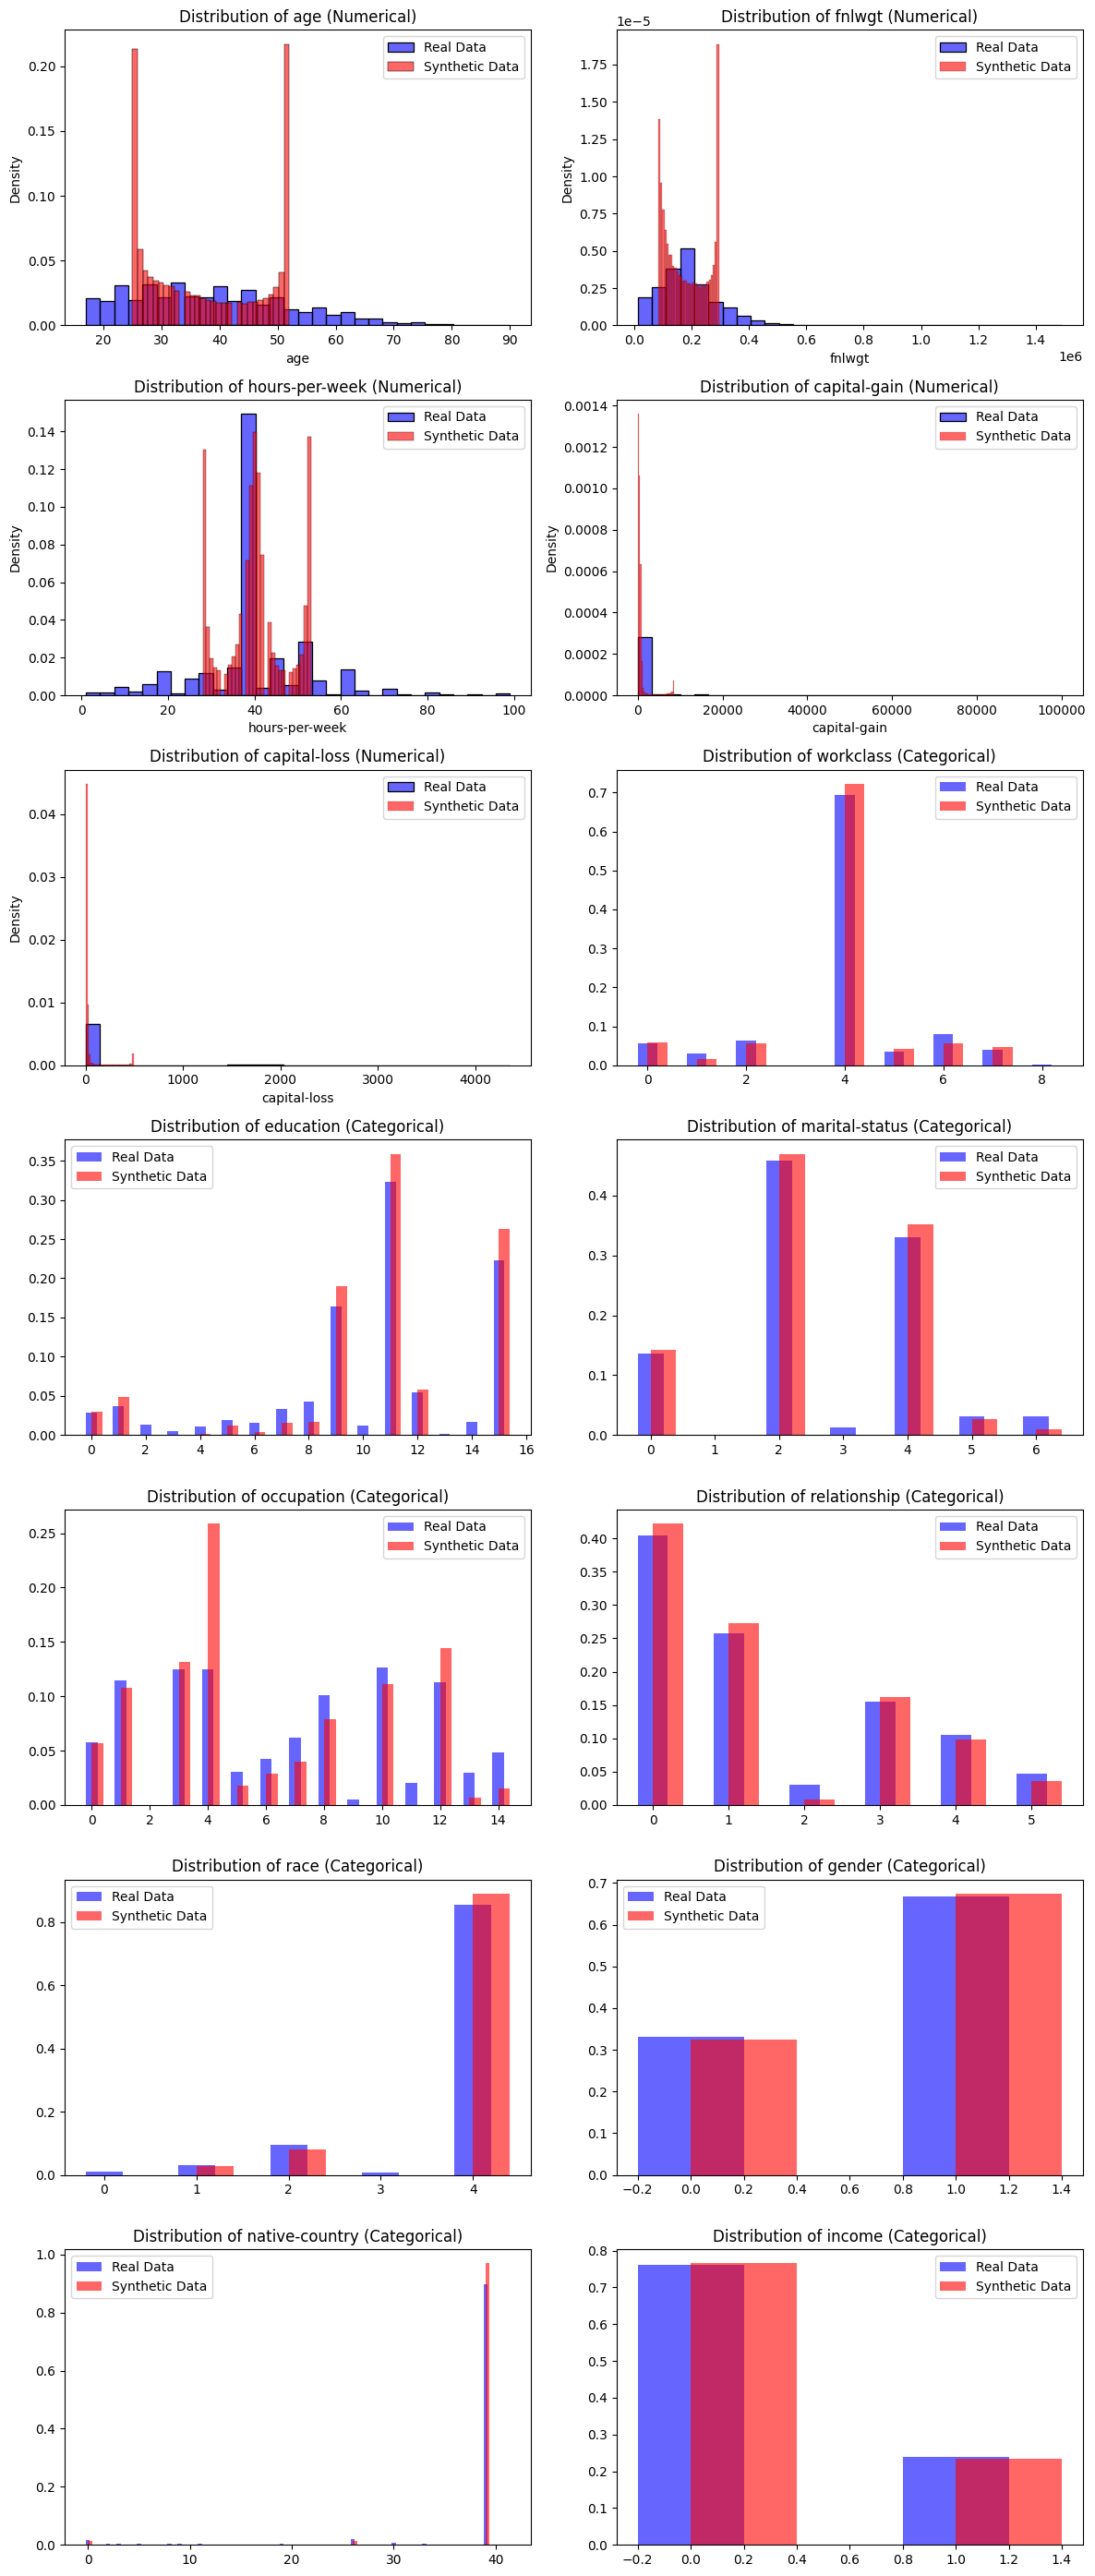

In [12]:
# Import evaluation functions from indoxGen_torch
from indoxGen_torch import evaluate_utility, evaluate_statistical_similarity, evaluate_privacy, evaluate_data_drift, plot_distributions

# 1. Evaluate Utility: How well the synthetic data retains the utility for machine learning tasks
evaluate_utility(data, synthetic_data, classifiers=["LogisticRegression", "DecisionTree", "RandomForest", "MultiLayerPerceptron"])

# 2. Evaluate Statistical Similarity: Compare the statistical properties between real and synthetic data
evaluate_statistical_similarity(data, synthetic_data, cat_cols=categorical_columns)

# 3. Evaluate Privacy: Check for privacy risks in synthetic data
evaluate_privacy(data, synthetic_data)

# 4. Evaluate Data Drift: Measure distributional changes (data drift) between the real and synthetic data
drift_results = evaluate_data_drift(data, synthetic_data, categorical_columns, integer_columns)

# 5. Visualize Distributions: Compare the distributions of the real and synthetic data for categorical and integer columns
plot_distributions(data, synthetic_data, categorical_columns, integer_columns)
